In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 'date')

In [3]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
df.quantile(0.975)

value    177613.075
Name: 0.975, dtype: float64

In [5]:
df.quantile(0.025)

value    17876.4
Name: 0.025, dtype: float64

In [6]:
cleaned_df = df[(df['value'] > df['value'].quantile(0.025)) & 
    (df['value'] < df['value'].quantile(0.975))]

In [7]:
cleaned_df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [8]:
def draw_line_plot(df):
    x = df.index
    y = df['value']
    fig, ax = plt.subplots(figsize = (15,5))
    ax.plot(x, y)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_xticks(range(0, len(df), 200))

    


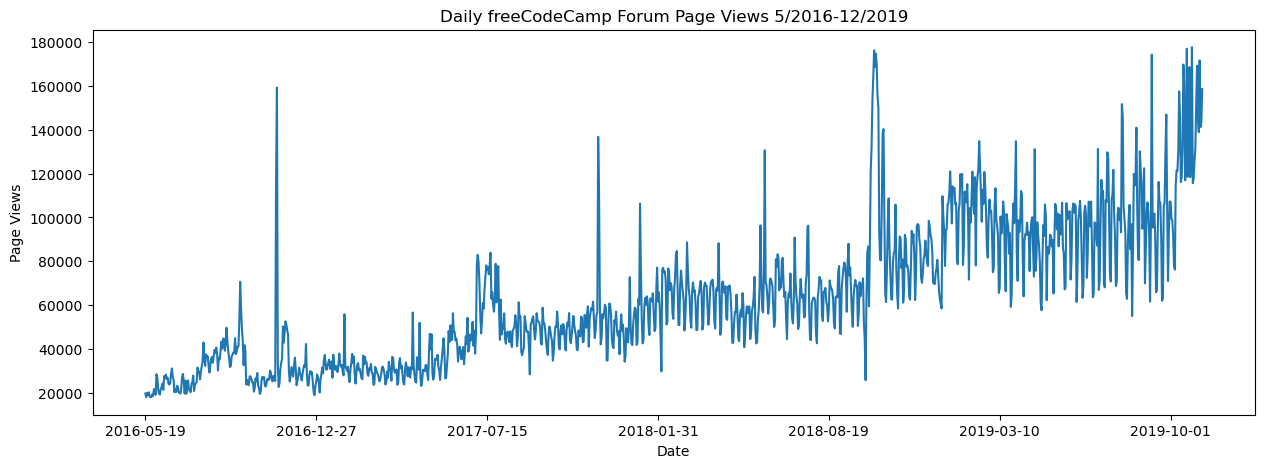

In [9]:
draw_line_plot(cleaned_df)

> # bar plot function

In [13]:
def draw_bar_plot(df):
    df.index = pd.to_datetime(df.index)
    df = df.resample('ME').mean().reset_index()
    
    df['month'] = df['date'].dt.strftime("%B")
    df['year'] = df['date'].dt.strftime("%Y")
    df = df[['year', 'month', 'value']]
    
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
   
    
    fig = sns.catplot(data = df, 
                      x = 'year', 
                      y = 'value', 
                      hue = 'month', 
                      kind = 'bar', 
                      palette ='bright', 
                      hue_order = month_order,
                      height = 6,
                      aspect = 1
                     )
    
    fig.set_axis_labels('Years','Average Page View')
    sns.move_legend(fig,'upper left', bbox_to_anchor = (0.17,1), title = 'Months')
    
    plt.show()
    
    



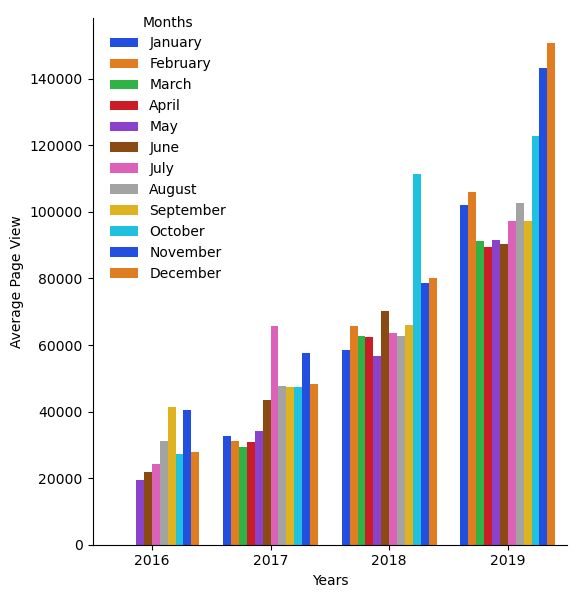

In [14]:
draw_bar_plot(cleaned_df)

> # box plot function


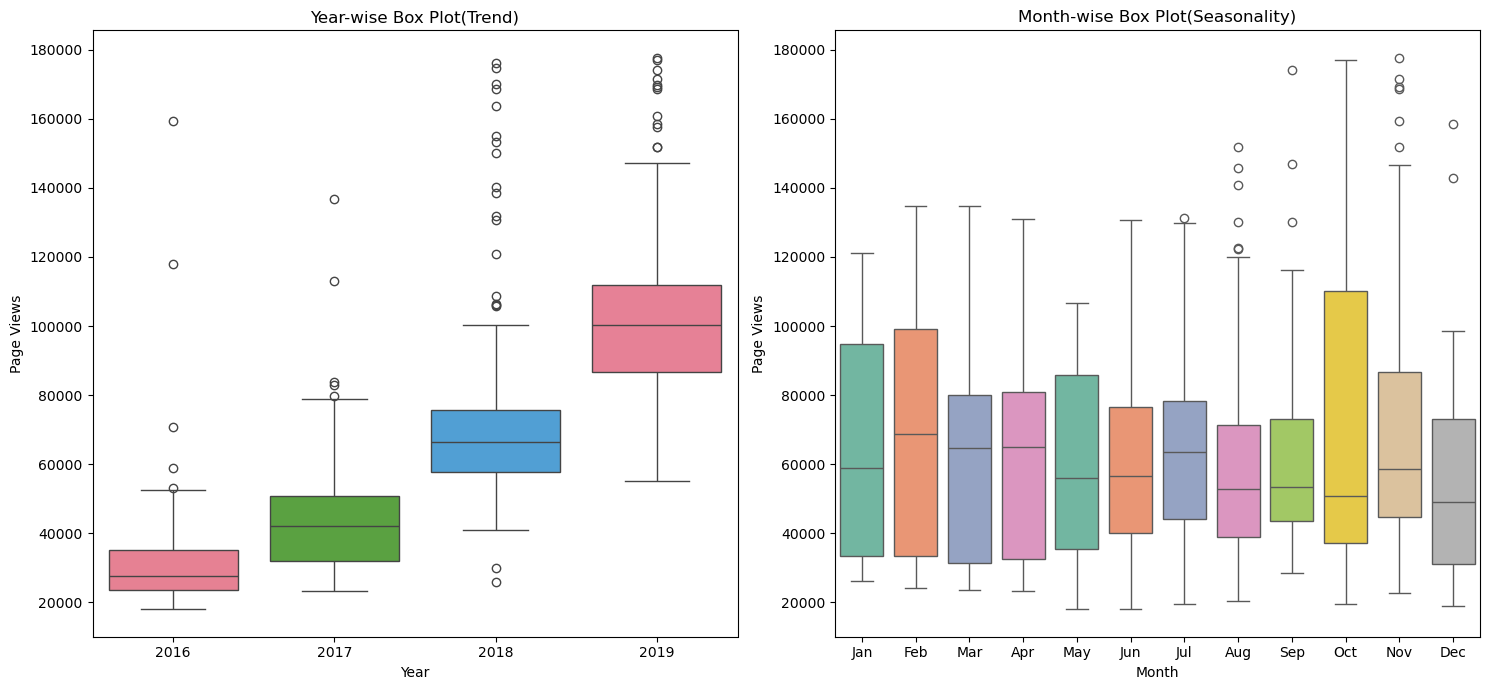

In [15]:
def draw_box_plot(df):
    df = df.copy()
    df.reset_index(inplace=True)
    df['year'] = [d.year for d in df.date]
    df['month'] = [d.strftime('%b') for d in df.date]
    

    
    fig , ax = plt.subplots(1,2, figsize = (15,7))
    sns.boxplot(ax = ax[0] ,data = df, x= df['year'], y= df['value'], palette =('husl'), hue = df['year'], legend = False)
    ax[0].set_title('Year-wise Box Plot(Trend)') 
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Page Views')
               

    
    
    sns.boxplot(data = df,ax = ax[1],
                      x = df['month'], 
                      y = df['value'],
                      order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', "Sep", "Oct", 'Nov', "Dec"],
                      palette = ('Set2'), hue = df['month'], legend = False)
    ax[1].set_title('Month-wise Box Plot(Seasonality)') 
    ax[1].set_xlabel('Month')
    ax[1].set_ylabel('Page Views')
               
    plt.tight_layout()
    plt.show()



draw_box_plot(cleaned_df)